<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

# Machine Learning Foundation

## Course 3, Part f: Boosting and Stacking LAB

Estimated time needed: **45** minutes

## Objectives

After completing this demo you will be able to:

*   Understand how Gradient Boosting helps reduce error
*   Identify the benefits of using AdaBoost
*   Interpret the benefits of stacking models and comparing their results to boosted models


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#Q1">Question 1</a></li>
        <li><a href="https://#Q2">Question 2</a></li>
        <li><a href="https://#Q3">Question 3</a></li>
        <li><a href="https://#Q4">Question 4</a></li>
        <li><a href="https://#Q5">Question 5</a></li>
        <li><a href="https://#Q6">Question 6</a></li>
</div>
<br>
<hr>


## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

For each record in the dataset it is provided:

*   Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
*   Triaxial angular velocity from the gyroscope.
*   A 561-feature vector with time and frequency domain variables.
*   Its activity label.

More information about the features is available on the website shown above.


In [1]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt


In [2]:
def warn(*arg, **kwargs):
    pass
import warnings
warnings.warn = warn

<h2 id="Q1">Question 1</h2>

*   Import the data from the file `Human_Activity_Recognition_Using_Smartphones_Data.csv` and examine the shape and data types. For the data types, there will be too many to list each column separately. Rather, aggregate the types by count.
*   Determine if the float columns need to be scaled.


In [3]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv", sep=',')

The data has quite a few predictor columns.


In [4]:
data.shape

(10299, 562)

And they're all float values. The only non-float is the categories column, which is being predicted.


In [5]:
data.dtypes.value_counts()

float64    561
object       1
Name: count, dtype: int64

The minimum and maximum value for the float columns is -1.0 and 1.0, respectively. However, scaling is never required for tree-based methods.


In [6]:
data.select_dtypes(include='float').describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Mask to select float columns
# float_columns = (data.dtypes == np.float64)
float_columns = data.select_dtypes('float').columns
float_columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)

In [8]:
# Verify that the maximum of all float columns is 1.0
(data.loc[:, float_columns].max() == 1.0).all()

np.True_

In [9]:
# Verify that the minimum of all float columns is -1.0
(data.loc[:, float_columns].min() == -1.0).all()

np.True_

<h2 id="Q2">Question 2</h2>

*   Integer encode the activities.
*   Split the data into train and test data sets. Decide if the data will be stratified or not during the train/test split.


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Activity'] = le.fit_transform(data['Activity'])

le.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [11]:
data.Activity.unique()

array([2, 1, 0, 3, 4, 5])

**NOTE**: We are about to create training and test sets from `data`. On those datasets, we are going to run grid searches over many choices of parameters. This can take some time. In order to shorten the grid search time, feel free to downsample `data` and create `X_train, X_test, y_train, y_test` from the downsampled dataset.

Now split the data into train and test data sets. A stratified split was not used here. If there are issues with any of the error metrics on the test set, it can be a good idea to start model fitting over using a stratified split. Boosting is a pretty powerful model, though, so it may not be necessary in this case.


In [12]:
# Test the other way, but cannot be used
data.columns.map(lambda x: x != 'Activity')

Index([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
       ...
        True,  True,  True,  True,  True,  True,  True,  True,  True, False],
      dtype='bool', length=562)

In [13]:
[c for c in data.columns if c != 'Activity']

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [14]:
from sklearn.model_selection import train_test_split as tts

# Alternatively, we could stratify the categories in the split, as was done previously
feature_columns = [x for x in data.columns if x != 'Activity']

X_train, X_test, y_train, y_test = tts(data[feature_columns], 
                                       data['Activity'], 
                                       test_size=.3, 
                                       random_state=42)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7209, 561), (7209,), (3090, 561), (3090,))

<h2 id="Q3">Question 3</h2>

*   Fit gradient boosted tree models with all parameters set to their defaults with the following tree numbers (`n_estimators = [15, 25, 50, 100, 200, 400]`) and evaluate the accuracy on the test data for each of these models.
*   Plot the accuracy as a function of estimator number.

*Note:* there is no out-of-bag error for boosted models. And the `warm_flag=True` setting has a bug in the gradient boosted model, so don't use it. Simply create the model inside the `for` loop and set the number of estimators at this time. This will make the fitting take a little longer. Additionally, boosting models tend to take longer to fit than bagged ones because the decision stumps must be fit successively.


In [16]:
from sklearn.ensemble import GradientBoostingClassifier as gbc
from sklearn.metrics import accuracy_score

It is not recommended to run the following code because it will take very long time (nearly half-an-hour). Instead use the following code:
```python
error_list = list()

tree_list = [15,25,50,100,200,400]

# Iterate through various possibilities for number of trees
for n_trees in tree_list:
    model = gbc(n_estimators = n_trees, random_state=42)

    # Fit model
    print(f'Fit model with {n_trees} trees')

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Get error score
    error = 1.0 - accuracy_score(y_test, y_pred)

    # Store results
    error_list.append(pd.Series({'n_trees': n_trees, 'error': error}))

error_df = pd.concat(error_list, axis=1).T.set_index('n_trees')
error_df
```

In [18]:
error_df = pd.DataFrame(index = pd.Index([15.0,25.0,50.0,100.0,200.0,400.0], name='n_trees'), 
                 data = [0.051133,0.034304,0.019741,0.012945,0.011974,0.011650], 
                 columns=['error'])
error_df

,error
n_trees,
15.0,0.051133
25.0,0.034304
50.0,0.019741
100.0,0.012945
200.0,0.011974
400.0,0.011650


Now plot the result.


(0.0, 440.00000000000006)

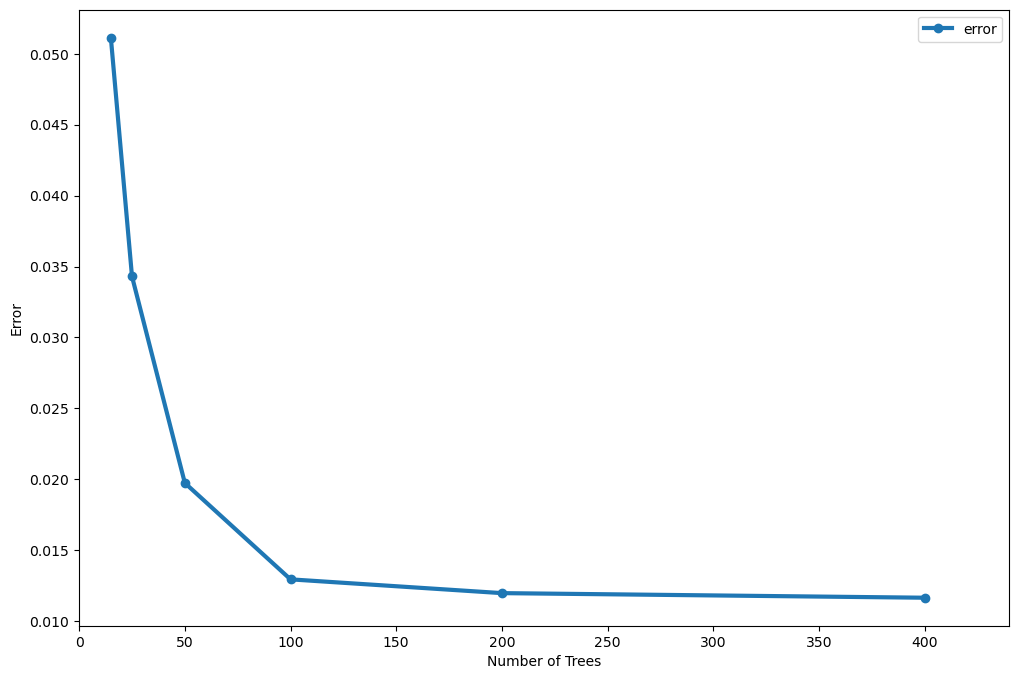

In [19]:
ax = error_df.plot(marker='o', figsize=(12,8), lw=3)
ax.set(xlabel='Number of Trees', ylabel='Error')
ax.set_xlim(0, max(error_df.index) * 1.1)

<h2 id="Q4">Question 4</h2>

*   Using a grid search with cross-validation, fit a new gradient boosted classifier with the same list of estimators as question 3. Also try varying the learning rates (0.1, 0.01, 0.001, etc.), the subsampling value (1.0 or 0.5), and the number of maximum features (1, 2, etc.).
*   Examine the parameters of the best fit model.
*   Calculate relevant error metrics on this model and examine the confusion matrix.


In [21]:
from sklearn.model_selection import GridSearchCV as gscv

In [22]:
tree_list = [15,25,50,100,200,400]
param_grid = {'n_estimators': tree_list, 
              'learning_rate': [.1,.01,.001,.0001], 
              'subsample': [1.0,.5], 
              'max_features': [1,2,3,4]}

In [23]:
gv_gbc = gscv(estimator = gbc(random_state=42), 
              param_grid = param_grid, 
              scoring = 'accuracy', 
              n_jobs = -1)
gv_gbc = gv_gbc.fit(X_train, y_train)

In [27]:
# Save model file as pickle
import pickle
pickle.dump(gv_gbc, open('gv_gbc_object.p', 'wb'))

In [28]:
# Load back the model file
gv_gbc = pickle.load(open('gv_gbc_object.p', 'rb'))

In [29]:
gv_gbc.best_estimator_

GradientBoostingClassifier(max_features=4, n_estimators=400, random_state=42,
                           subsample=0.5)

The error metrics. Classification report is particularly convenient for multi-class cases.


In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
y_pred = gv_gbc.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       597
           1       0.96      0.97      0.97       557
           2       0.97      0.97      0.97       550
           3       1.00      1.00      1.00       540
           4       1.00      1.00      1.00       419
           5       1.00      0.99      0.99       427

    accuracy                           0.99      3090
   macro avg       0.99      0.99      0.99      3090
weighted avg       0.99      0.99      0.99      3090



The confusion matrix. Note that the gradient boosted model has a little trouble distinguishing between activity class 1 and 2.


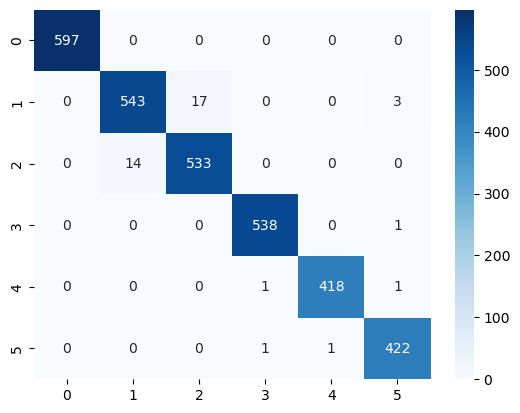

In [33]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.show()

<h2 id="Q5">Question 5</h2>

*   Create an AdaBoost model and fit it using grid search, much like question 4. Try a range of estimators between 100 and 200.
*   Compare the errors from AdaBoost to those from the GradientBoostedClassifier.


In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))
param_grid = {'n_estimators': [100,150,200], 
              'learning_rate': [0.01, 0.001]}

gv_abc = gscv(estimator = abc, 
              param_grid = param_grid, 
              scoring='accuracy', 
              n_jobs=-1)
gv_abc.fit(X_train, y_train)

The best model.


In [33]:
# The best model
gv_abc.best_estimator_

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=100)

The error metrics. Note that the issues with class 1 and 2 appear to have become more problematic. Also note other issues for classes 3 - 5. AdaBoost is very sensitive to outliers, so that could be the problem here.


In [34]:
y_pred = gv_abc.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       597
           1       0.00      0.00      0.00         0
           2       1.00      0.49      0.66      1109
           3       1.00      0.39      0.56      1384
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.54      3090
   macro avg       0.50      0.31      0.37      3090
weighted avg       1.00      0.54      0.68      3090



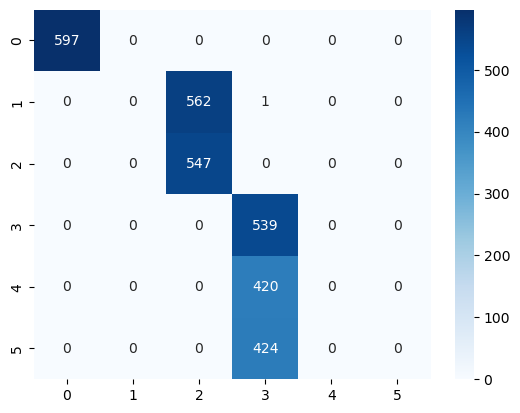

In [35]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.show()

<h2 id="Q6">Question 6</h2>

*   Fit a logistic regression model with regularization.
*   Using `VotingClassifier`, fit the logistic regression model along with either the GratientBoostedClassifier or the AdaBoost model (or both) from questions 4 and 5.
*   Determine the error as before and compare the results to the appropriate gradient boosted model(s).
*   Plot the confusion matrix for the best model created in this set of exercises.


In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr_l2 = LogisticRegression(penalty='l2', max_iter=500, solver='saga').fit(X_train, y_train)

Check the errors and confusion matrix for the logistic regression model.


In [38]:
y_pred = lr_l2.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       598
           1       0.95      0.96      0.95       558
           2       0.95      0.95      0.95       547
           3       1.00      0.99      0.99       544
           4       0.98      1.00      0.99       413
           5       1.00      0.98      0.99       430

    accuracy                           0.98      3090
   macro avg       0.98      0.98      0.98      3090
weighted avg       0.98      0.98      0.98      3090



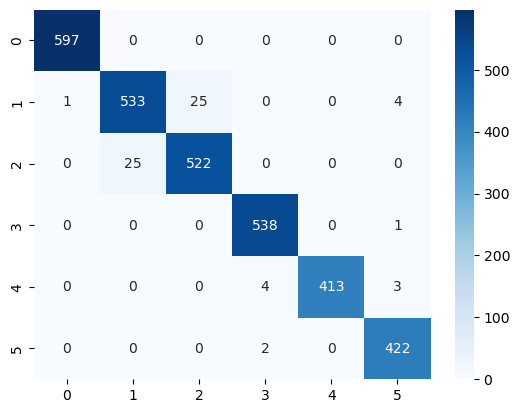

In [39]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.show()

And now the stacked model.


In [ ]:
from sklearn.ensemble import VotingClassifier

# Combined model --> logistic regression and gradient boosted trees
estimators = [('LR_L2', lr_l2), ('GBC', gv_gbc)]

vc = VotingClassifier(estimators, voting='soft')
vc.fit(X_train, y_train)

Performance for the voting classifier should improve relative to either logistic regression or gradient boosted trees alone. However, the fact that logistic regression does almost as well as gradient boosted trees is an important reminder to try the simplest model first. In some cases, its performance will be good enough.


In [41]:
y_pred = vc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       597
           1       0.98      0.96      0.97       563
           2       0.97      0.98      0.97       547
           3       1.00      1.00      1.00       539
           4       1.00      0.99      1.00       420
           5       0.98      1.00      0.99       424

    accuracy                           0.99      3090
   macro avg       0.99      0.99      0.99      3090
weighted avg       0.99      0.99      0.99      3090



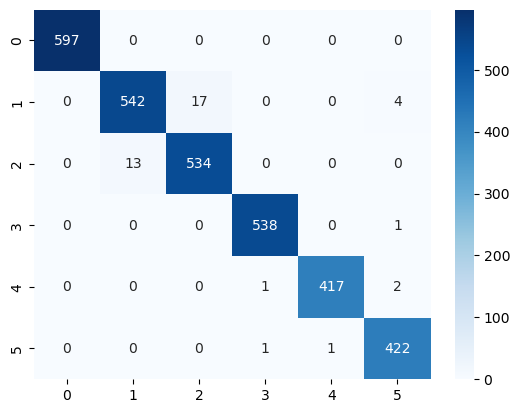

In [42]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.show()
#sns.set_context('talk')
#cm = confusion_matrix(y_test, y_pred)
#ax = sns.heatmap(cm, annot=True, fmt='d')
### END SOLUTION

***

### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/richard-ye/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01" target="_blank">Richard Ye</a>

## <h3 align="center"> Machine Learning Foundation (C) 2020 IBM Corporation </h3>

<!--## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description |
| ----------------- | ------- | ---------- | ------------------ |
| 2022-03-23        | 0.1     | Joseph Santarcangelo | Created Lab Template |
| 2022-05-03        | 0.2     | Richard Ye | Added in estimated time, objectives and table of contents |--!>


